<a href="https://colab.research.google.com/github/wajdizar/waj/blob/master/MScFE_610_GWP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multicollinearity (WAJDI)

In [ ]:
#!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import boxcox
from sklearn import preprocessing
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss


plt.rcParams['figure.figsize'] = (16, 9)

In [ ]:
df = yf.download(['TSLA', 'NVDA', 'AMD', 'SQ', 'TLRY', 'OXY', 'DVN', 'JNJ', 'BTC-USD', 'SCHD', 'CL=F'], start='2017-01-01', end='2023-03-24')['Adj Close']
df.dropna(inplace=True)
df.rename(columns = {'BTC-USD':'BTC', 'CL=F': 'OIL' }, inplace = True)
df.head(10)

[*********************100%***********************]  11 of 11 completed


,AMD,BTC,OIL,DVN,JNJ,NVDA,OXY,SCHD,SQ,TLRY,TSLA
Date,,,,,,,,,,,
2018-07-19,16.709999,7466.859863,69.459999,34.918716,111.074707,62.438545,72.700958,43.270420,70.320000,22.389999,21.348667
2018-07-20,16.500000,7354.129883,70.459999,34.918716,110.995323,62.156120,72.788567,43.210644,70.410004,29.770000,20.905333
2018-07-23,16.660000,7711.109863,67.889999,34.974087,111.683243,61.789463,72.236626,43.185017,71.599998,29.450001,20.213333
2018-07-24,16.190001,8424.269531,68.519997,35.250969,114.091011,61.616043,73.121498,43.321655,69.360001,25.360001,19.828667
2018-07-25,16.049999,8181.390137,69.300003,35.812641,113.438362,62.398899,73.883728,43.577843,72.529999,26.490000,20.582666
2018-07-26,18.350000,7951.580078,69.610001,35.717712,114.902435,63.134701,73.734787,43.842571,71.989998,26.400000,20.443333
2018-07-27,18.940001,8165.009766,68.690002,35.243053,116.022514,62.436069,73.130264,43.637630,69.849998,24.299999,19.812000
2018-07-30,19.420000,8180.479980,70.129997,35.646515,116.569351,60.481377,72.990074,43.612011,65.620003,22.840000,19.344667
2018-07-31,18.330000,7780.439941,68.760002,35.606956,116.878036,60.662231,73.533279,44.004822,64.650002,22.100000,19.875999


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AMD,1178.0,67.489278,33.948010,16.049999,32.415000,73.930000,90.150002,161.910004
BTC,1178.0,21803.543929,17078.046542,3242.484863,8165.395874,16246.833008,36360.438477,67566.828125
OIL,1178.0,65.111299,20.796626,-37.630001,52.727501,63.099998,77.425001,123.699997
DVN,1178.0,30.255194,18.610144,4.407207,17.851943,23.291526,45.236722,74.357452
JNJ,1178.0,144.586726,19.686314,102.753571,125.730270,141.474594,162.141823,181.108810
NVDA,1178.0,127.084764,75.286734,31.531864,55.881990,129.114418,179.217926,333.350739
OXY,1178.0,41.945410,19.480746,8.763958,25.614782,40.314426,60.182458,75.595413
SCHD,1178.0,59.212300,12.899060,35.349922,46.656265,57.282040,72.309515,78.500946
SQ,1178.0,120.024338,69.980183,38.090000,67.634998,80.295002,171.222496,281.809998
TLRY,1178.0,24.721732,31.004369,2.360000,5.842500,12.015000,26.724999,214.059998


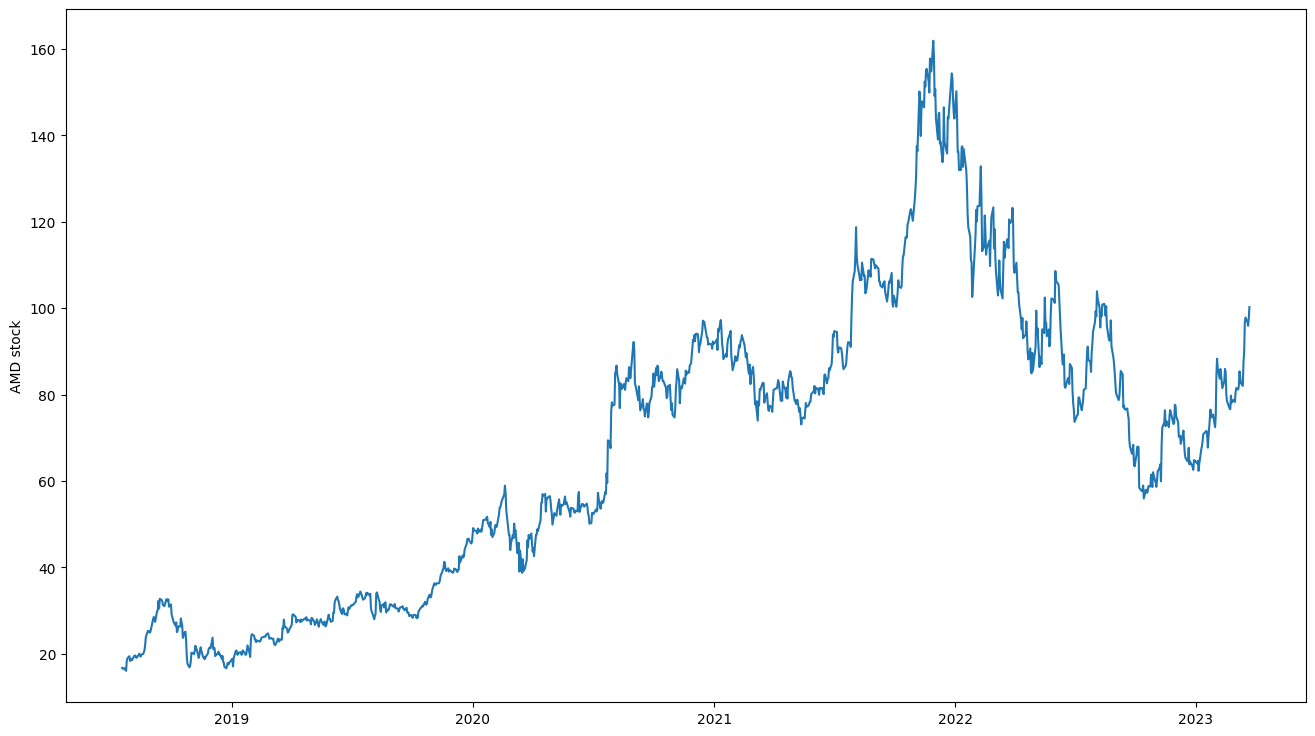

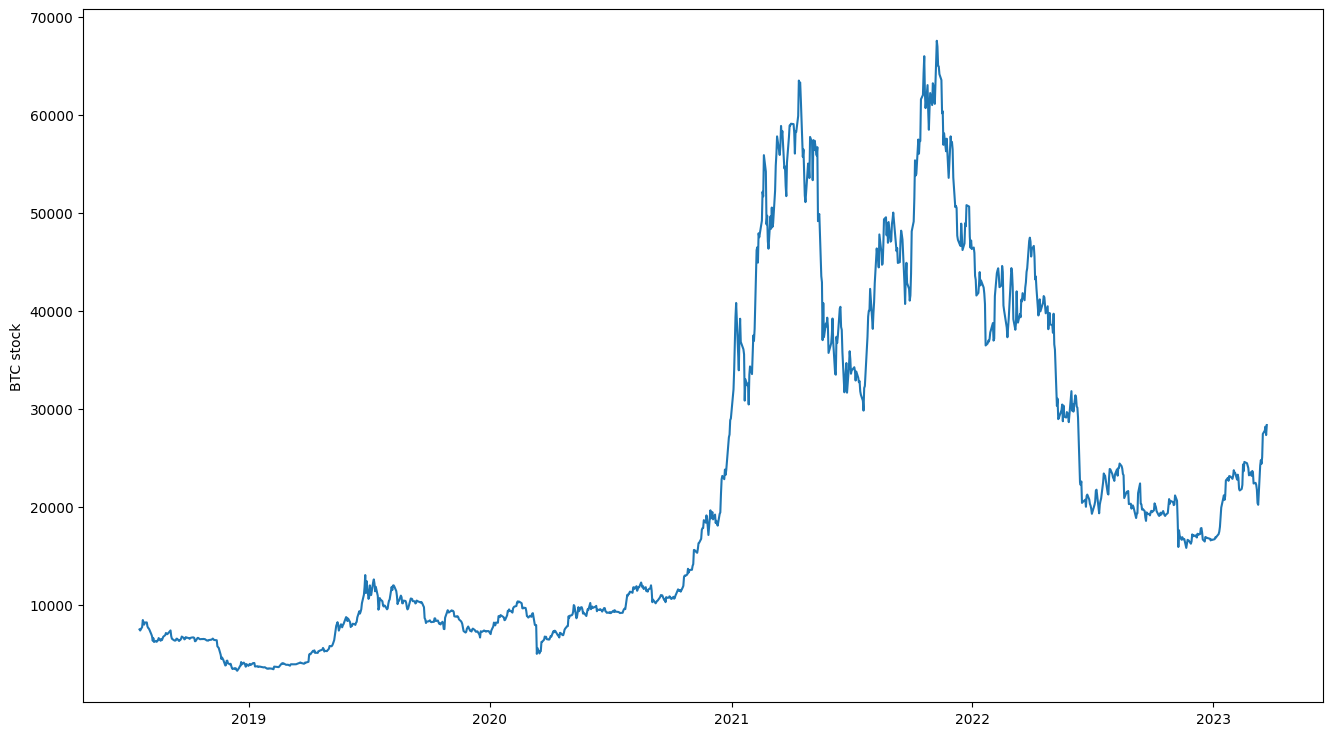

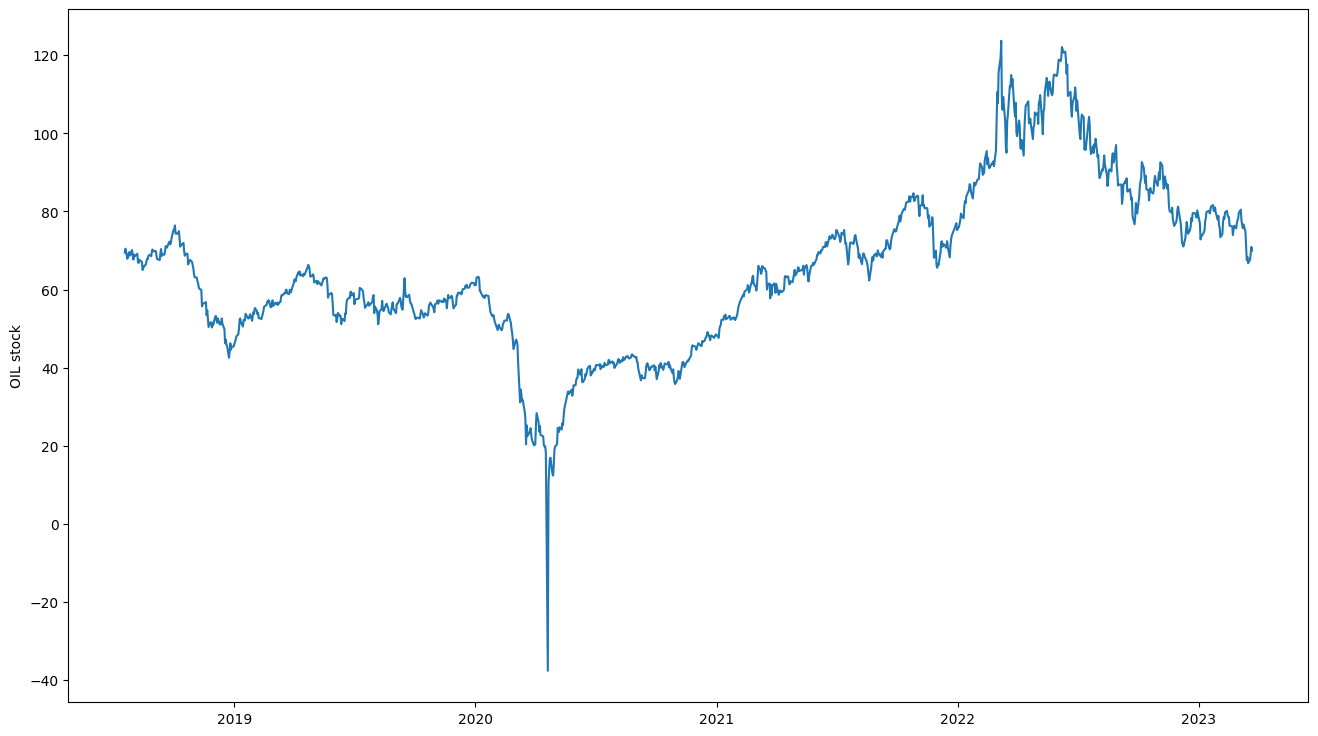

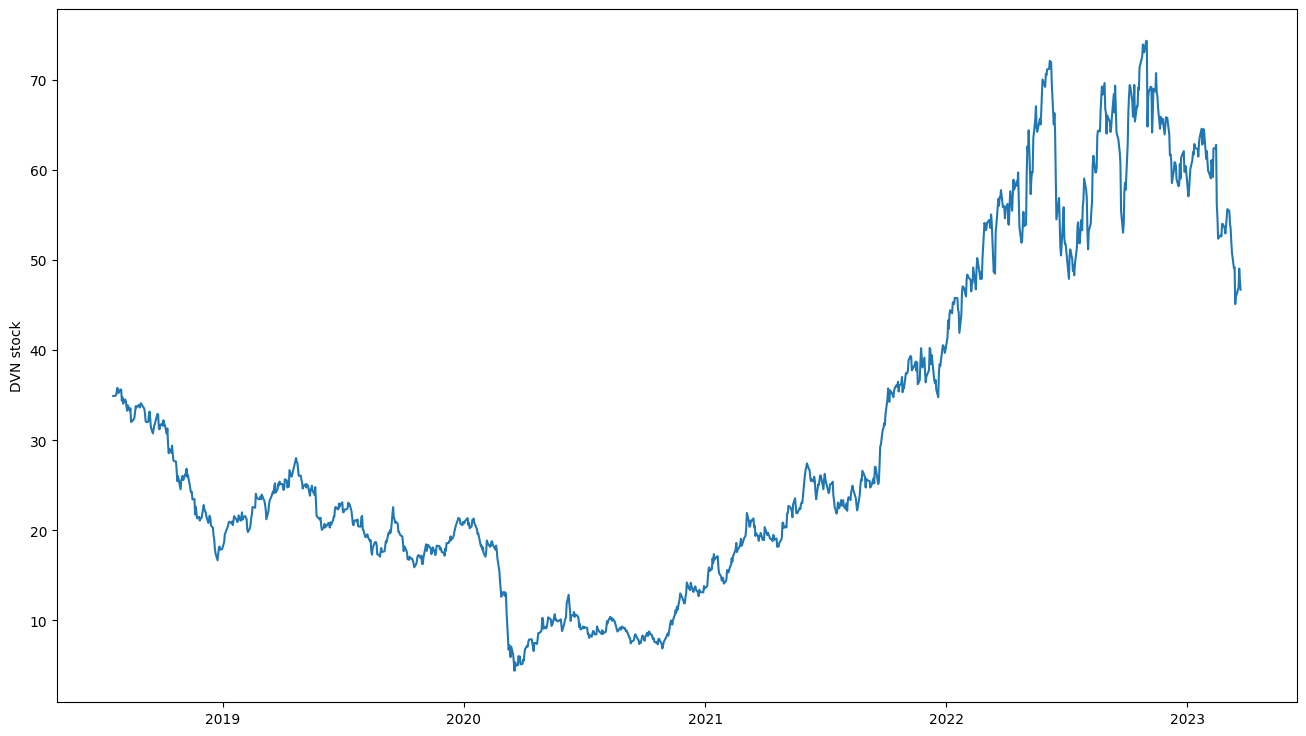

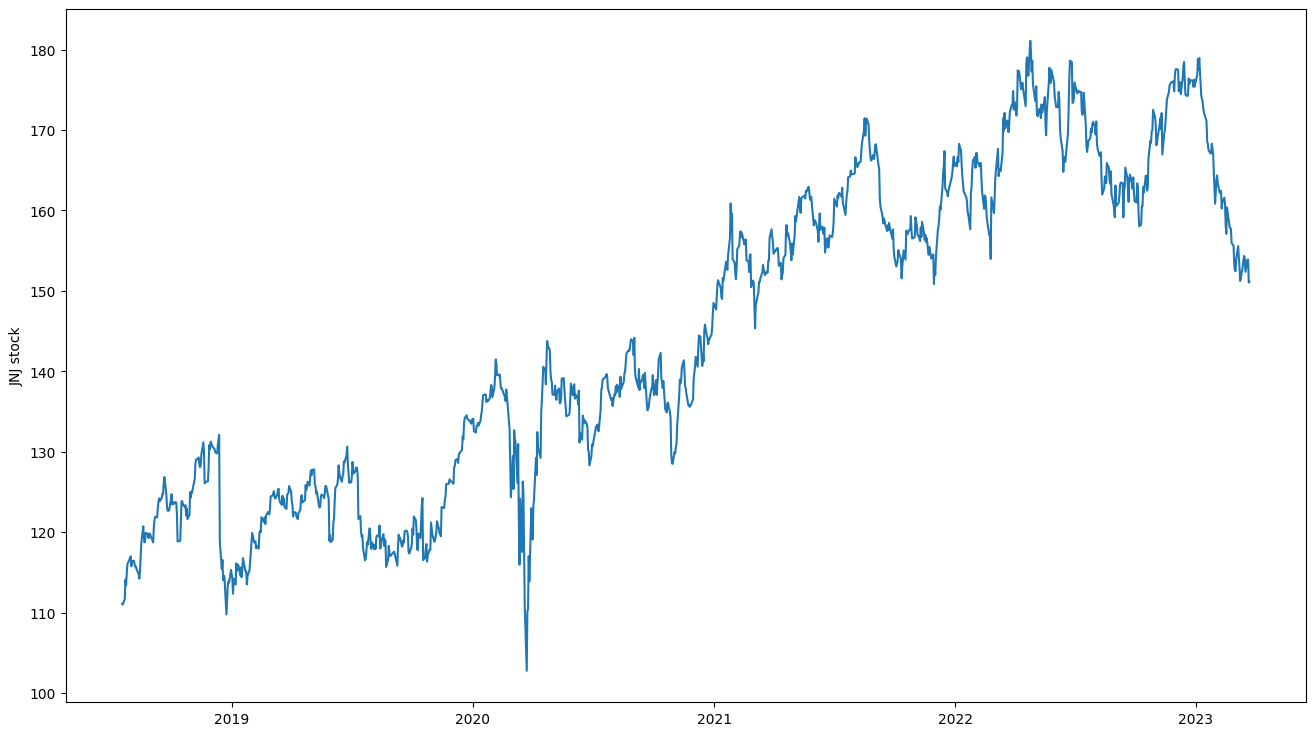

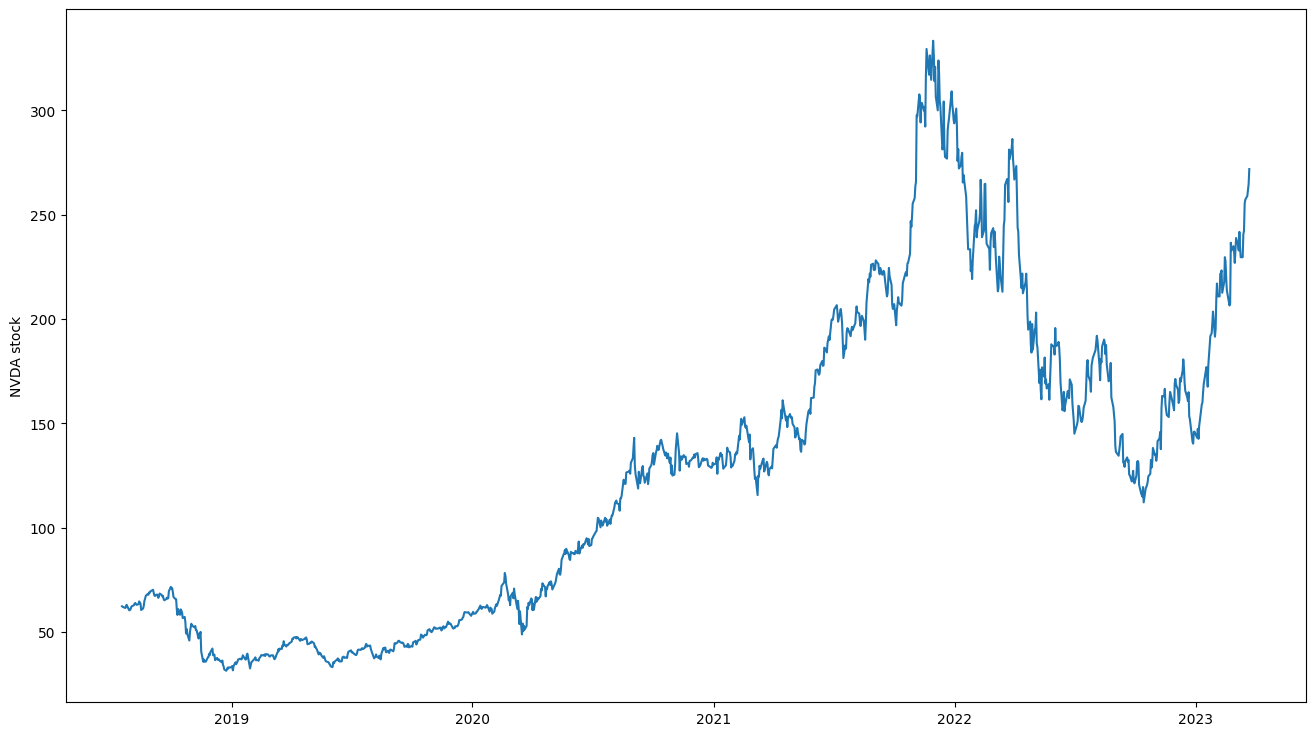

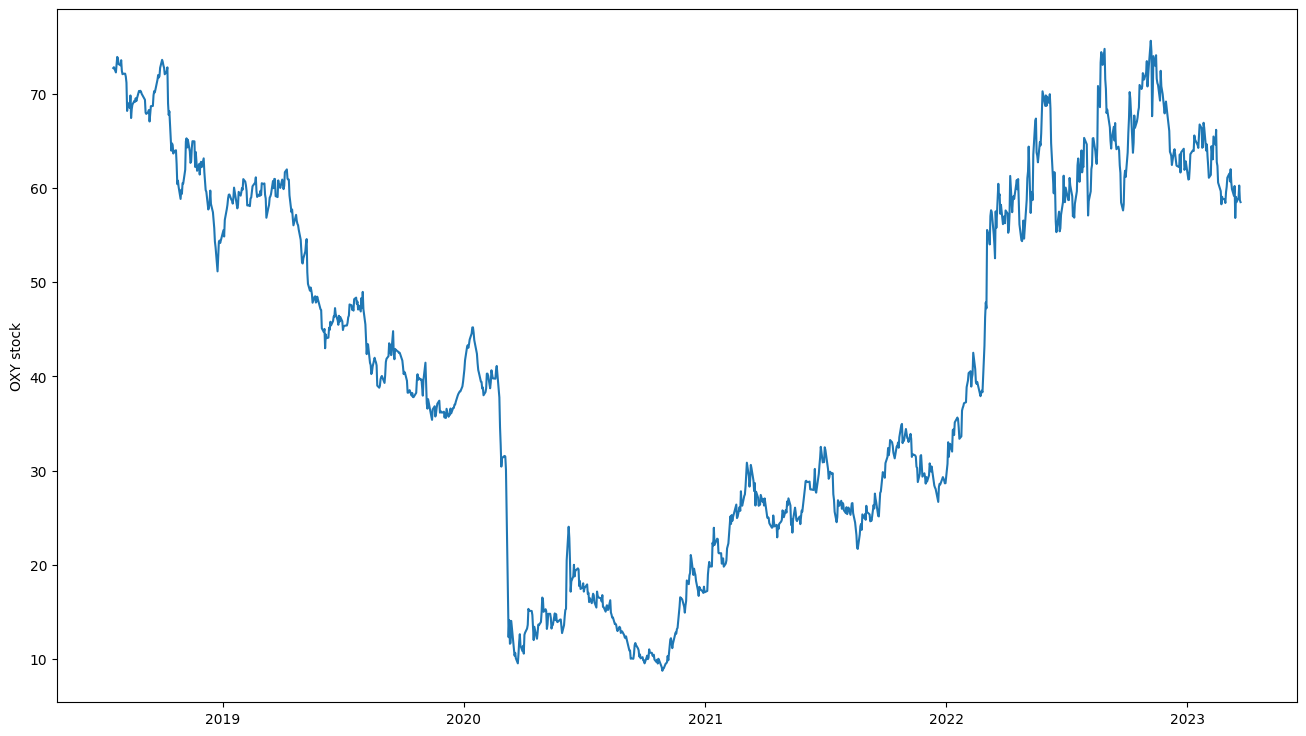

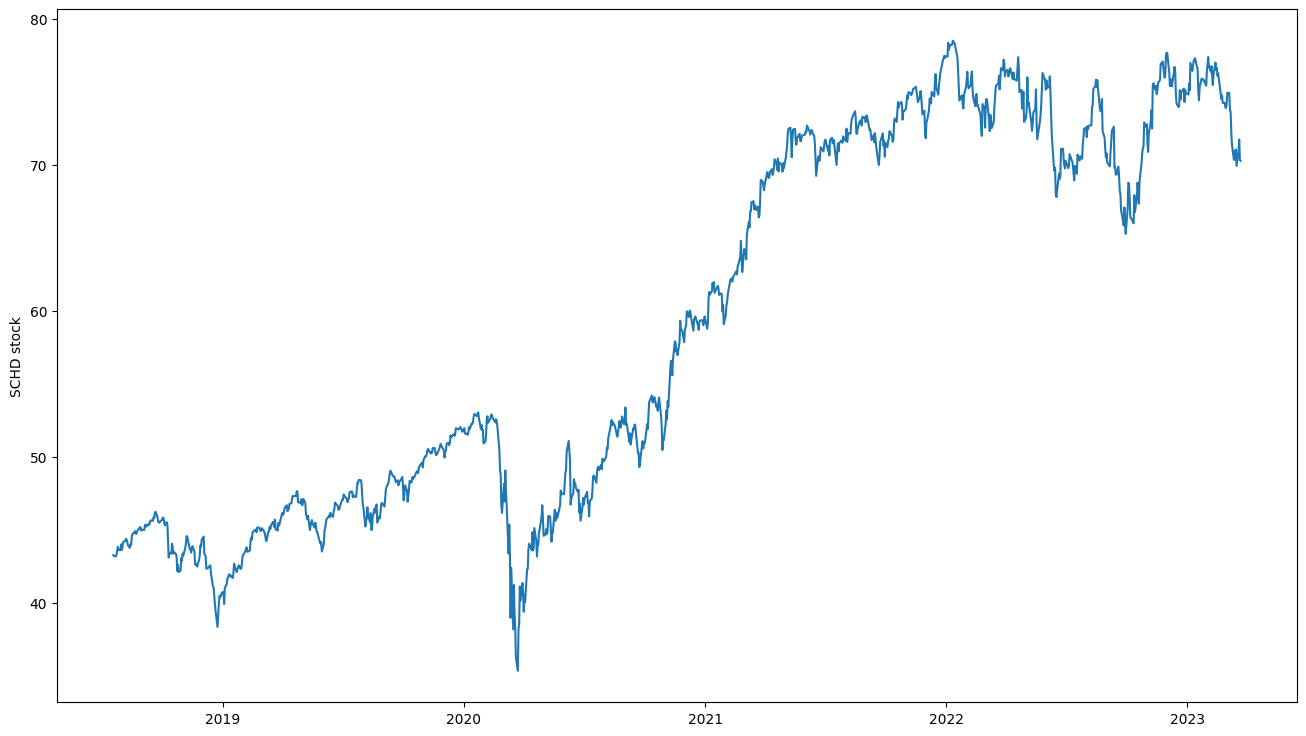

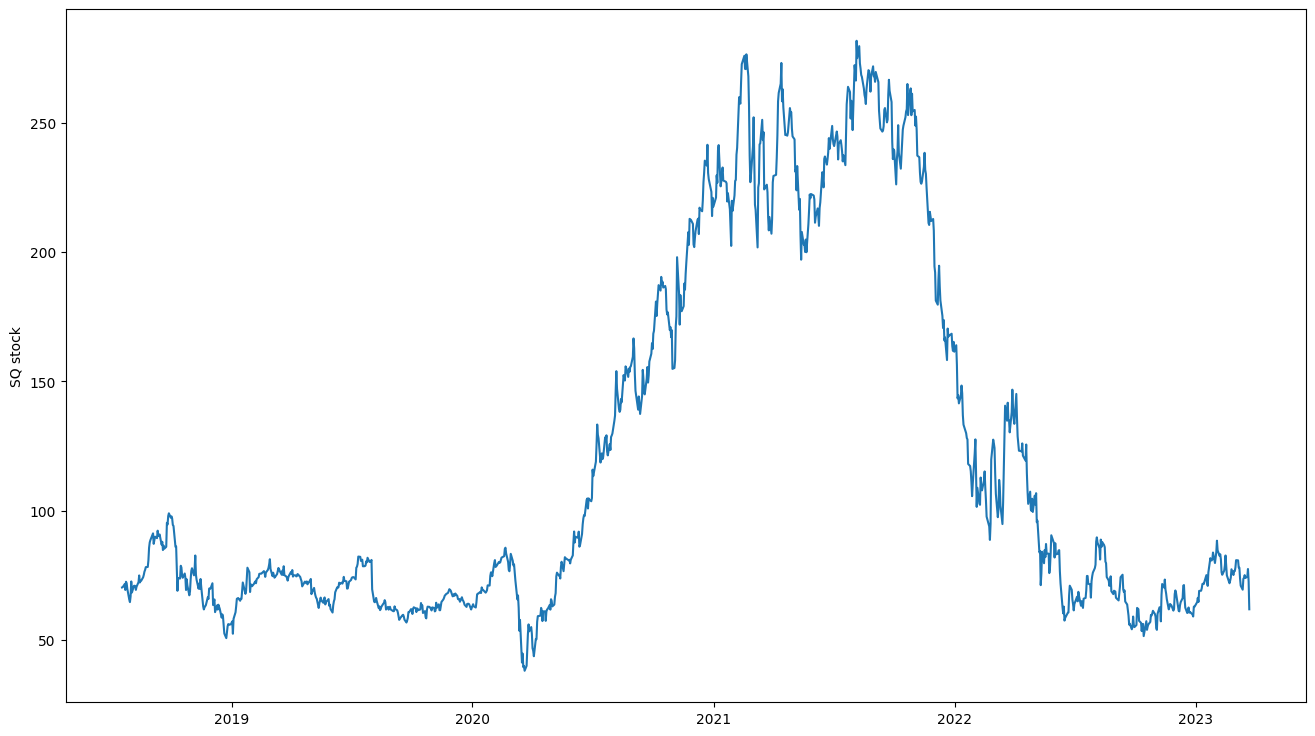

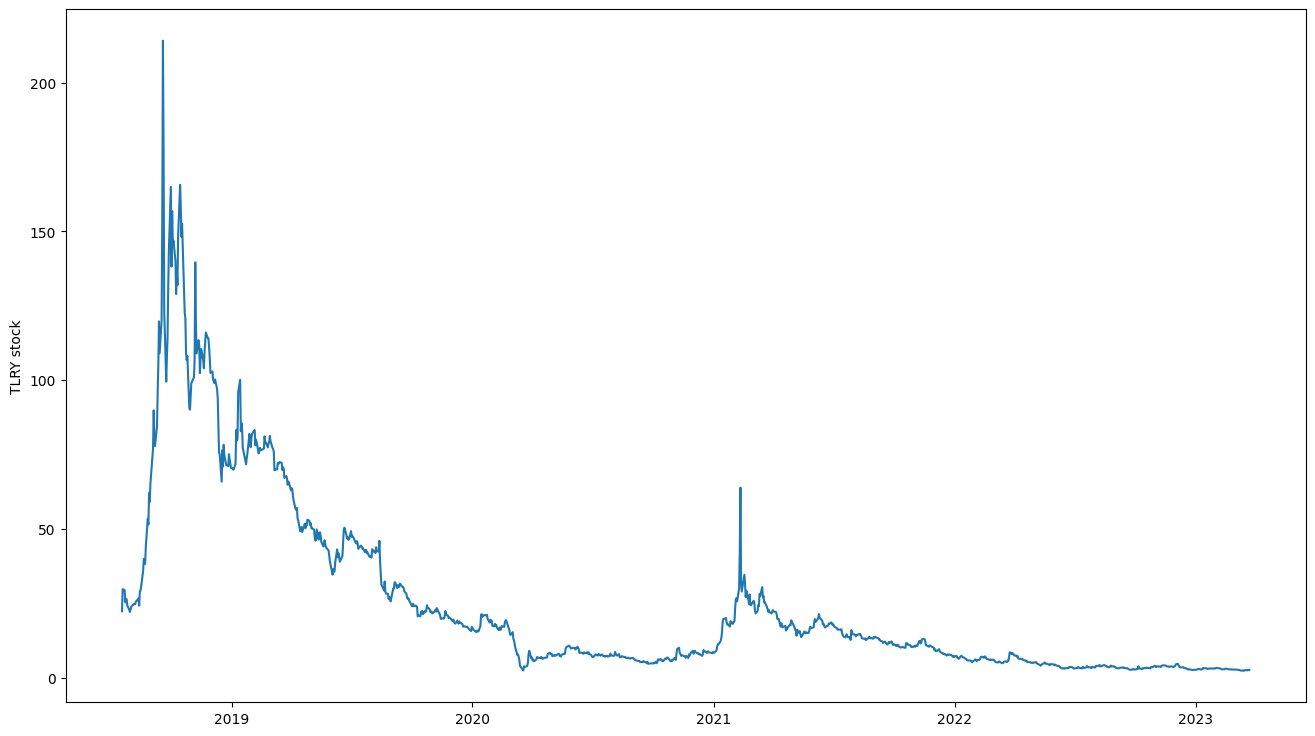

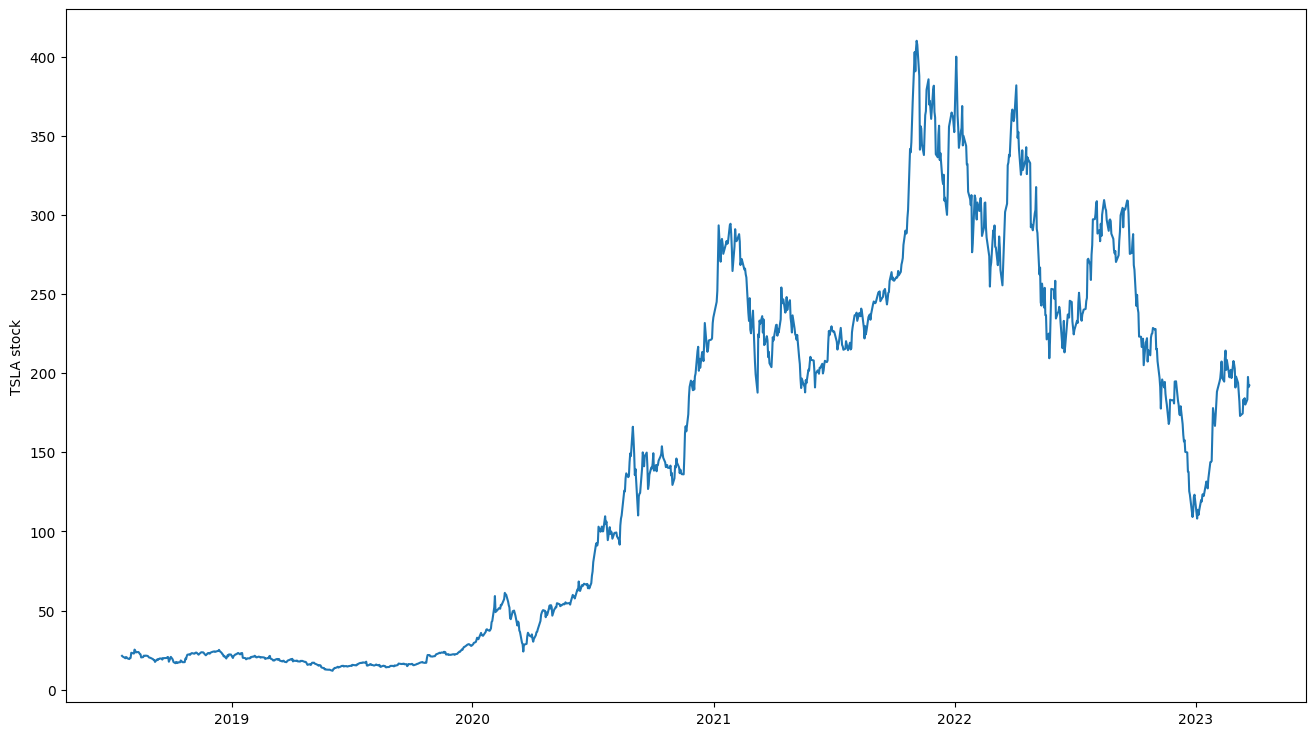

In [ ]:
for a in df.columns:
  plt.plot(df[a])
  plt.ylabel(a+' stock')
  plt.show()

In [ ]:
Y = df['OIL']
X = df.drop(['OIL'], axis=1)

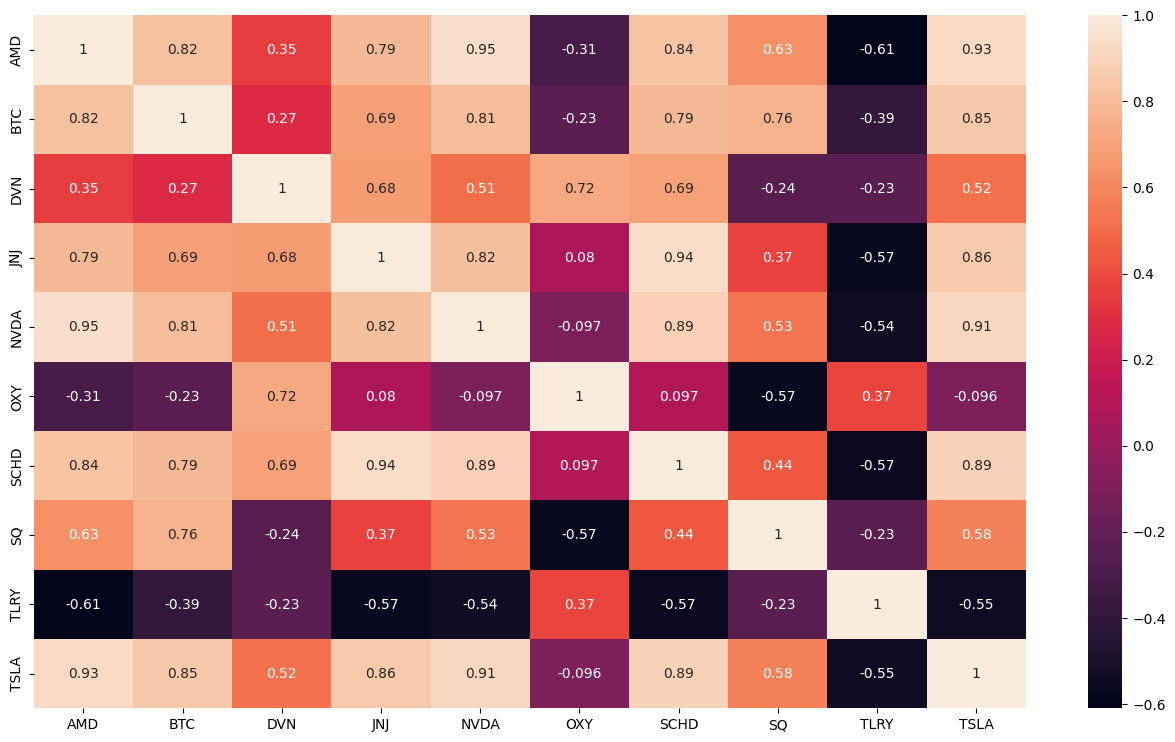

In [ ]:
df_corr = X.corr()
sns.heatmap(df_corr, annot=True)
plt.show()

As we can

In [ ]:

df.columns

Index(['AMD', 'BTC', 'OIL', 'DVN', 'JNJ', 'NVDA', 'OXY', 'SCHD', 'SQ', 'TLRY',
       'TSLA'],
      dtype='object')

In [ ]:
model_col = smf.ols('OIL ~ AMD + NVDA + SQ + TSLA + SCHD + OXY + TLRY + JNJ + DVN + BTC', data=df).fit()
model_col.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    OIL   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     703.0
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:04:51   Log-Likelihood:                -4097.8
No. Observations:                1178   AIC:                             8218.
Df Residuals:                    1167   BIC:                             8273.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0996      4.437     -0.248      0.804      -9.805       7.606
AMD            0.2937      0.038      7.812      0.000       0.220       0.367
NVDA          -0.0818      0.013     -6.179      0.000      -0.108      -0.056
SQ            -0.0076      0.009     -0.828      0.408      -0.026       0.010
TSLA           0.0036      0.008      0.439      0.660      -0.013       0.020
SCHD           0.2529      0.102      2.487      0.013       0.053       0.452
OXY            0.6851      0.054     12.737      0.000       0.580       0.791
TLRY          -0.0090      0.015     -0.600      0.549      -0.038       0.020
JNJ        -6.198e-05      0.042     -0.001      0.999      -0.082       0.082
DVN            0.2147      0.074      2.901      0.004       0.069       0.360
BTC            0.0003    3.8e-05      8.676      0.000       0.000       0.000
==============================================================================
Omnibus:                      169.521   Durbin-Watson:                   0.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1776.004
Skew:                          -0.258   Prob(JB):                         0.00
Kurtosis:                       8.993   Cond. No.                     5.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_col.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-1.099626,4.437065,-0.247827,8.043116e-01,-9.805142,7.605890
AMD,0.293657,0.037592,7.811766,1.250374e-14,0.219902,0.367412
NVDA,-0.081813,0.013240,-6.179354,8.878169e-10,-0.107790,-0.055837
SQ,-0.007574,0.009142,-0.828425,4.075995e-01,-0.025510,0.010363
TSLA,0.003645,0.008297,0.439353,6.604869e-01,-0.012633,0.019923
SCHD,0.252926,0.101701,2.486959,1.302293e-02,0.053389,0.452462
OXY,0.685085,0.053787,12.736976,6.878140e-35,0.579555,0.790615
TLRY,-0.008974,0.014960,-0.599839,5.487297e-01,-0.038326,0.020378
JNJ,-0.000062,0.041608,-0.001490,9.988117e-01,-0.081696,0.081572
DVN,0.214725,0.074030,2.900524,3.795247e-03,0.069479,0.359970


In [ ]:
labels = ['Intercept', 'AMD', 'BTC', 'DVN', 'JNJ', 'NVDA', 'OXY', 'SCHD', 'SQ', 'TLRY', 'TSLA']

variables = model_col.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

pd.DataFrame(vif[1:], labels[1:], columns=["VIF"])

,VIF
AMD,30.865423
BTC,18.830403
DVN,7.757219
JNJ,17.381204
NVDA,32.615603
OXY,20.807894
SCHD,4.077418
SQ,12.715653
TLRY,35.972502
TSLA,7.976120


'AMD', 'BTC', 'OIL', 'DVN', 'JNJ', 'NVDA', 'OXY', 'SQ', 'TLRY', and 'TSLA' have all VIF values larger than 5, this mean these values have severe multicollinearity and we need to investigate this further to deal with this issue ae have several options:


*   Dropping these elements
*   Using dimension reduction techniques like PCA




In [ ]:
df_pca = preprocessing.scale(X)
pca = PCA(10)
pca.fit(df_pca)


PCA(n_components=10)

In [ ]:
pr_var = pca.explained_variance_ratio_
cum_pr = np.cumsum(pca.explained_variance_ratio_)
ind = ["Proportion of variance", "Cumulative proportion of variance"]
cols = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", 'PC9', 'PC10']
pd.DataFrame(np.vstack((pr_var, cum_pr)), ind, columns=cols)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Proportion of variance,0.627778,0.224767,0.085326,0.023075,0.015464,0.009283,0.008327,0.002320,0.002028,0.001633
Cumulative proportion of variance,0.627778,0.852544,0.937870,0.960945,0.976409,0.985692,0.994019,0.996338,0.998367,1.000000


In [ ]:
pc_res = pd.DataFrame(pca.components_.T, index=list(X.columns), columns=cols)
pc_res

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
AMD,0.379264,-0.112220,-0.030641,0.486360,0.070411,0.027603,0.076044,0.258296,0.678813,-0.258990
BTC,0.349771,-0.140374,0.329756,-0.250508,-0.571777,-0.504122,-0.255254,-0.124861,0.149705,0.047310
DVN,0.206658,0.565165,-0.022975,-0.026628,-0.091204,0.068719,0.103258,0.305793,0.144170,0.706149
JNJ,0.361271,0.173441,-0.088957,-0.321623,0.676525,-0.264824,-0.096423,-0.405403,0.162728,0.010020
NVDA,0.379202,0.021504,0.045910,0.529890,-0.061362,0.317507,-0.394499,-0.425471,-0.324311,0.162611
OXY,-0.054732,0.629144,0.270982,-0.121859,-0.236403,0.307933,0.138631,-0.313121,0.172810,-0.463752
SCHD,0.379479,0.160108,0.005727,-0.229414,0.093851,0.116105,-0.351431,0.595181,-0.366817,-0.378300
SQ,0.240954,-0.432426,0.411464,-0.377432,0.084595,0.588947,0.214913,-0.011322,0.099634,0.181477
TLRY,-0.251629,0.095208,0.794521,0.277871,0.354955,-0.222287,-0.103179,0.160553,-0.061557,0.059375
TSLA,0.385260,0.015260,0.075785,0.169171,-0.022387,-0.254679,0.744256,-0.024796,-0.431538,-0.104212


## Direction
We can go into two direction even based on the correlation analysis we can drop value that have more than 0.8 correlation and recheck the model.
A better direction will be to use the PCA since PC1+PC2 describe 85% of the input data this more elegant but we loose the ability to describe the data and explain the effect since if we take PC1 or PC2 they are not dominant by any independant variables they use all of them without any dominant independant variable.


# Unit Root Testing (WAJDI)

In [ ]:
for i in X.columns:
  X[i+'_return'] = X[i].pct_change()
X.head()

,AMD,BTC,DVN,JNJ,NVDA,OXY,SCHD,SQ,TLRY,TSLA,AMD_return,BTC_return,DVN_return,JNJ_return,NVDA_return,OXY_return,SCHD_return,SQ_return,TLRY_return,TSLA_return
Date,,,,,,,,,,,,,,,,,,,,
2018-07-19,16.709999,7466.859863,34.918716,111.074707,62.438545,72.700958,43.270420,70.320000,22.389999,21.348667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-20,16.500000,7354.129883,34.918716,110.995323,62.156120,72.788567,43.210644,70.410004,29.770000,20.905333,-0.012567,-0.015097,0.000000,-0.000715,-0.004523,0.001205,-0.001381,0.001280,0.329611,-0.020766
2018-07-23,16.660000,7711.109863,34.974087,111.683243,61.789463,72.236626,43.185017,71.599998,29.450001,20.213333,0.009697,0.048541,0.001586,0.006198,-0.005899,-0.007583,-0.000593,0.016901,-0.010749,-0.033102
2018-07-24,16.190001,8424.269531,35.250969,114.091011,61.616043,73.121498,43.321655,69.360001,25.360001,19.828667,-0.028211,0.092485,0.007917,0.021559,-0.002807,0.012250,0.003164,-0.031285,-0.138879,-0.019030
2018-07-25,16.049999,8181.390137,35.812641,113.438362,62.398899,73.883728,43.577843,72.529999,26.490000,20.582666,-0.008647,-0.028831,0.015934,-0.005720,0.012705,0.010424,0.005914,0.045704,0.044558,0.038026


In [ ]:
X.columns

Index(['AMD', 'BTC', 'DVN', 'JNJ', 'NVDA', 'OXY', 'SCHD', 'SQ', 'TLRY', 'TSLA',
       'AMD_return', 'BTC_return', 'DVN_return', 'JNJ_return', 'NVDA_return',
       'OXY_return', 'SCHD_return', 'SQ_return', 'TLRY_return', 'TSLA_return'],
      dtype='object')

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


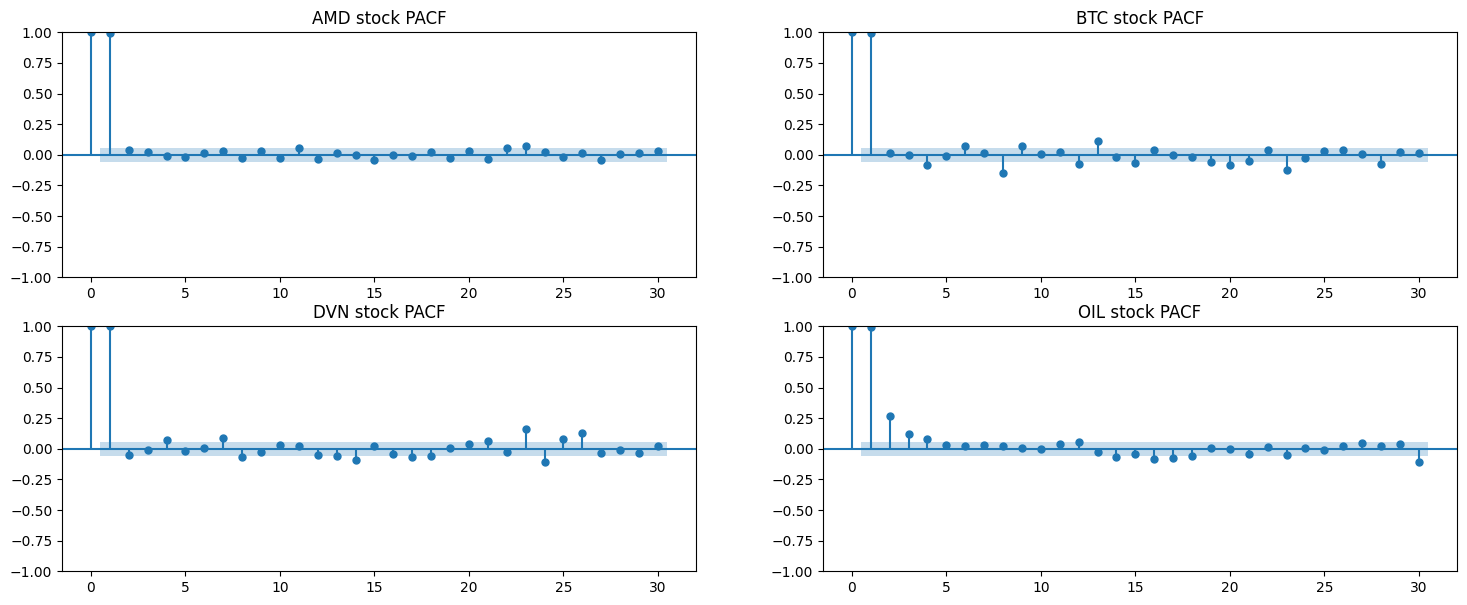

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(18, 7))
sm.graphics.tsa.plot_pacf(X["AMD"], title="AMD stock PACF", lags=30, ax=ax[0, 0])
sm.graphics.tsa.plot_pacf(X["BTC"], title="BTC stock PACF", lags=30, ax=ax[0, 1])
sm.graphics.tsa.plot_pacf(X["DVN"], title="DVN stock PACF", lags=30, ax=ax[1,0])
sm.graphics.tsa.plot_pacf(df["OIL"], title="OIL stock PACF", lags=30, ax=ax[1,1])
plt.show()

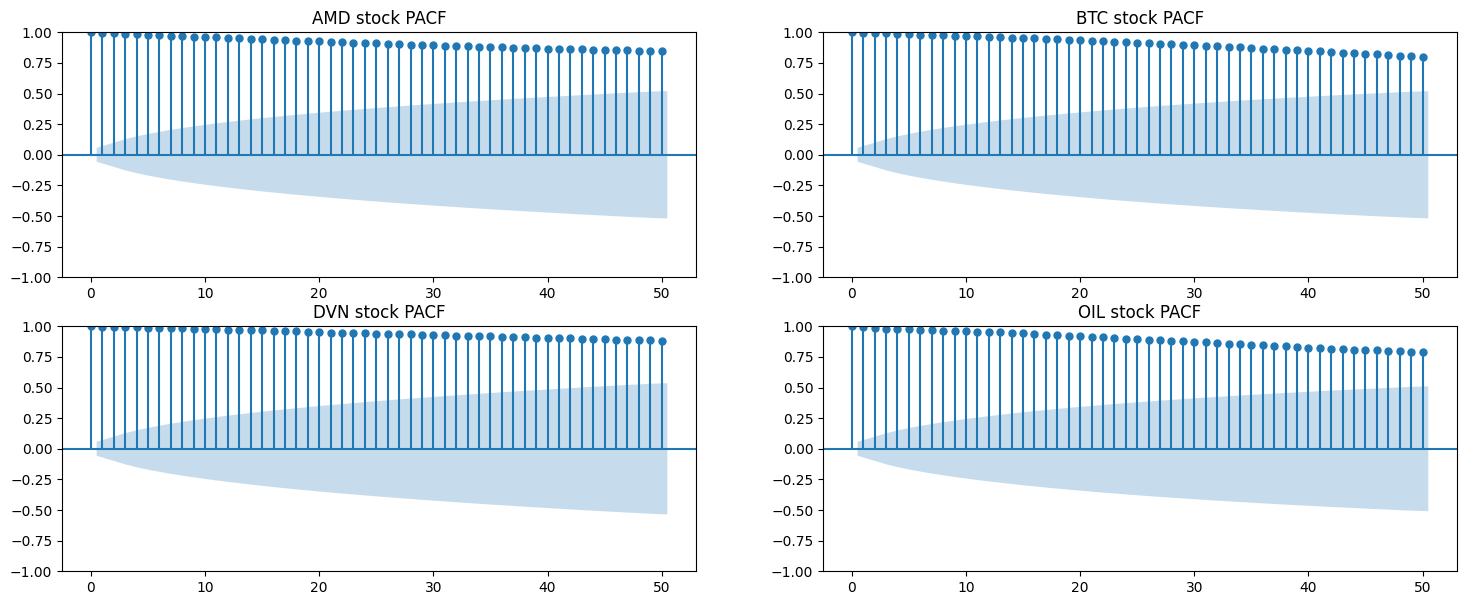

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(18, 7))
sm.graphics.tsa.plot_acf(X["AMD"], title="AMD stock PACF", lags=50, ax=ax[0, 0])
sm.graphics.tsa.plot_acf(X["BTC"], title="BTC stock PACF", lags=50, ax=ax[0, 1])
sm.graphics.tsa.plot_acf(X["DVN"], title="DVN stock PACF", lags=50, ax=ax[1,0])
sm.graphics.tsa.plot_acf(df["OIL"], title="OIL stock PACF", lags=50, ax=ax[1,1])
plt.show()

In [ ]:
def adf_test(i):
    indices = ["Test Statistic", "p-value", "# of Lags Used", "# of Observations Used"] 
    adf_test = adfuller(X[i], autolag="AIC")
    results = pd.Series(adf_test[0:4], index=indices)
    for key, value in adf_test[4].items():
        results[f"Critical Value ({i}) ({key})"] = value
    return results



## Analysis
As showen below we can see that the P-value of the stock price is bigger than 0.05 so we cannot reject the null hypothesis so we can say that they are not stationairy.
For the return value the p-value is very low so we can reject the null hypothesis and the return is stationairy.



In [ ]:
X.dropna(inplace=True)
adf_final = []
for k in X.columns:
  print(adf_test(k))

Test Statistic                  -1.553852
p-value                          0.506723
# of Lags Used                   0.000000
# of Observations Used        1176.000000
Critical Value (AMD) (1%)       -3.435923
Critical Value (AMD) (5%)       -2.864001
Critical Value (AMD) (10%)      -2.568080
dtype: float64
Test Statistic                  -1.713337
p-value                          0.424254
# of Lags Used                  22.000000
# of Observations Used        1154.000000
Critical Value (BTC) (1%)       -3.436029
Critical Value (BTC) (5%)       -2.864048
Critical Value (BTC) (10%)      -2.568105
dtype: float64
Test Statistic                  -0.924953
p-value                          0.779644
# of Lags Used                  23.000000
# of Observations Used        1153.000000
Critical Value (DVN) (1%)       -3.436034
Critical Value (DVN) (5%)       -2.864050
Critical Value (DVN) (10%)      -2.568106
dtype: float64
Test Statistic                  -1.737891
p-value                        

## GARCH()

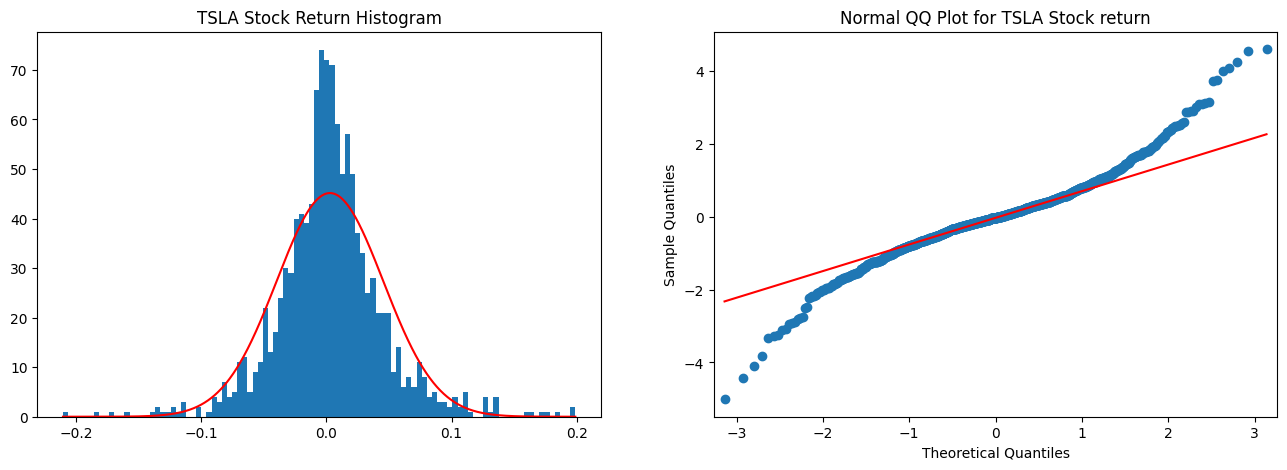

In [ ]:
from scipy import stats
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
TSLA = X['TSLA_return']
x = np.linspace(min(TSLA), max(TSLA), len(TSLA))
(mu, sigma) = stats.norm.fit(TSLA)
values, bins, _ = ax1.hist(TSLA, bins=100)
ax1.plot(x, stats.norm.pdf(x, mu, sigma) * sum(values * np.diff(bins)), 'r')
ax1.set(title= 'TSLA Stock Return Histogram')

sm.qqplot(TSLA, stats.norm, fit=True, line='q', ax=ax2)
ax2.set(title='Normal QQ Plot for TSLA Stock return')
plt.show()

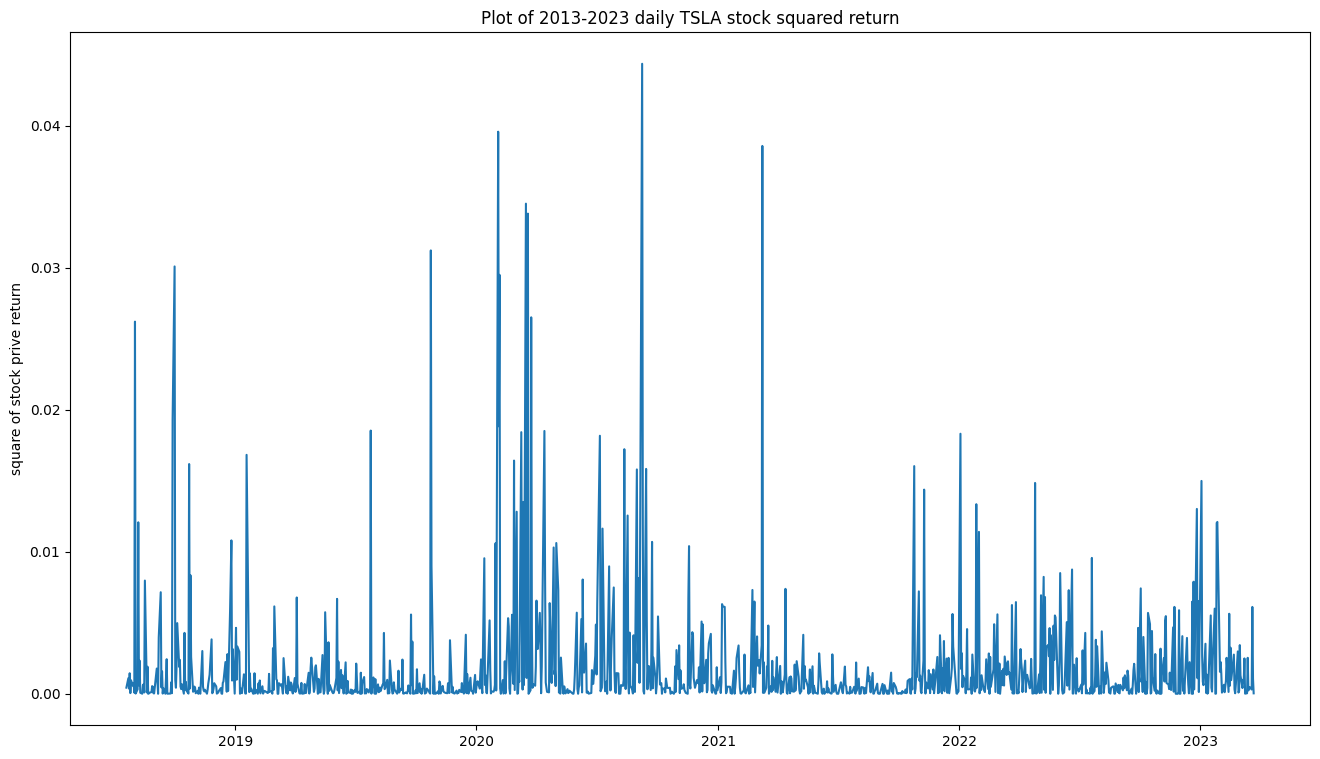

In [ ]:
plt.plot(TSLA**2)
plt.ylabel('square of stock prive return')
plt.title('Plot of 2013-2023 daily TSLA stock squared return')
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(-0.5, 0.5)

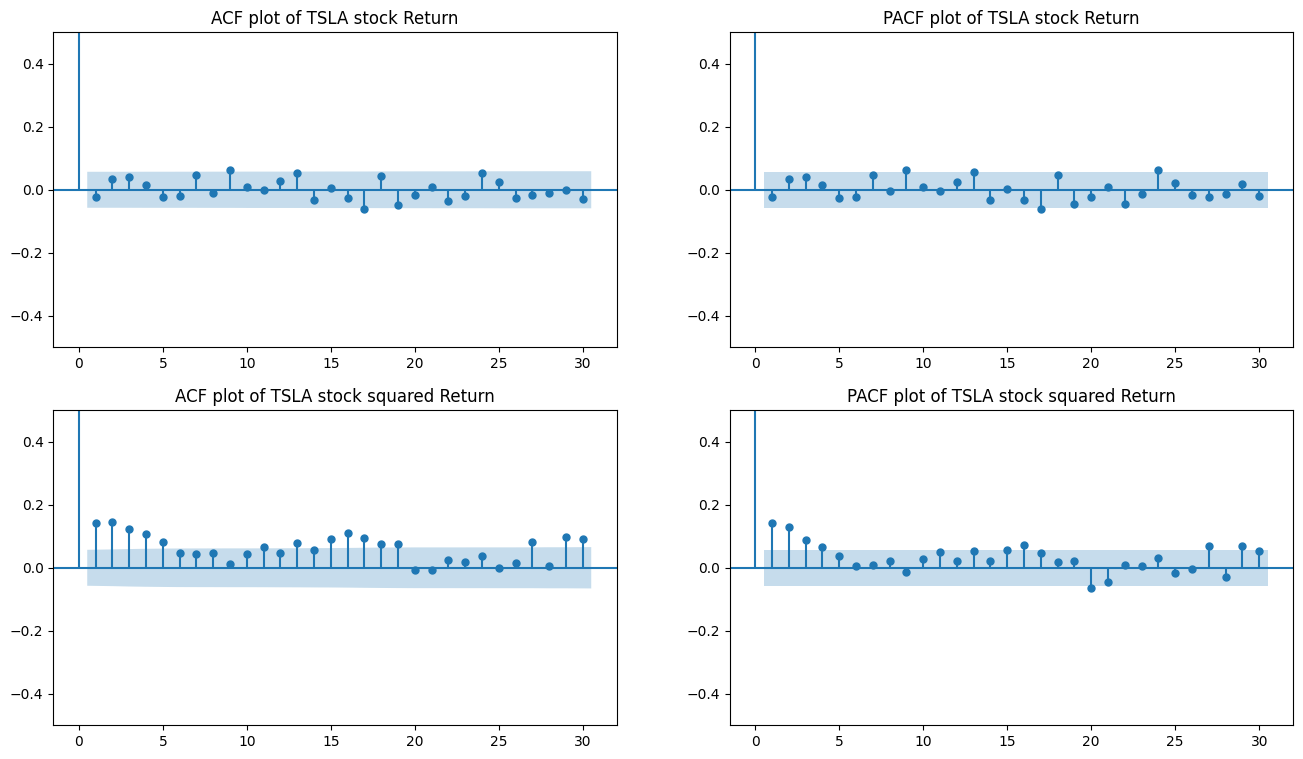

In [ ]:
fig, ax = plt.subplots(2, 2)
sm.graphics.tsa.plot_acf(TSLA, lags=30, ax=ax[0, 0])
ax[0, 0].set(title='ACF plot of TSLA stock Return')
ax[0, 0].set_ylim([-0.5, 0.5])

sm.graphics.tsa.plot_pacf(TSLA, lags=30, ax=ax[0, 1])
ax[0, 1].set(title='PACF plot of TSLA stock Return')
ax[0, 1].set_ylim([-0.5, 0.5])

sm.graphics.tsa.plot_acf(TSLA**2, lags=30, ax=ax[1, 0])
ax[1, 0].set(title='ACF plot of TSLA stock squared Return')
ax[1, 0].set_ylim([-0.5, 0.5])

sm.graphics.tsa.plot_pacf(TSLA**2, lags=30, ax=ax[1, 1])
ax[1, 1].set(title='PACF plot of TSLA stock squared Return')
ax[1, 1].set_ylim([-0.5, 0.5])

In [ ]:
#!pip install arch
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
garch11_spec = arch_model(TSLA, vol='GARCH', p=1, q=1, mean='AR', dist='StudentsT', rescale=True)
garch11_fit = garch11_spec.fit()
garch11_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 36459.23230881321
Iteration:      2,   Func. Count:     17,   Neg. LLF: 14176.443574196714
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2312.472166101621
Iteration:      4,   Func. Count:     33,   Neg. LLF: 1637.9606841757359
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1207.2369520903912
Iteration:      6,   Func. Count:     49,   Neg. LLF: 1491.3936513397402
Iteration:      7,   Func. Count:     56,   Neg. LLF: 544.8681081104562
Iteration:      8,   Func. Count:     63,   Neg. LLF: 541.301670459641
Iteration:      9,   Func. Count:     70,   Neg. LLF: 541.4744443170081
Iteration:     10,   Func. Count:     77,   Neg. LLF: 541.3751520549979
Iteration:     11,   Func. Count:     84,   Neg. LLF: 540.90380505538
Iteration:     12,   Func. Count:     90,   Neg. LLF: 540.8996218218633
Iteration:     13,   Func. Count:     96,   Neg. LLF: 540.8993537140178
Iteration:     14,   Func. Count:    102,   Neg. LLF: 540.89934

<class 'statsmodels.iolib.summary.Summary'>
"""
                              AR - GARCH Model Results                              
====================================================================================
Dep. Variable:                  TSLA_return   R-squared:                       0.000
Mean Model:                              AR   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -540.899
Distribution:      Standardized Student's t   AIC:                           1091.80
Method:                  Maximum Likelihood   BIC:                           1117.15
                                              No. Observations:                 1177
Date:                      Thu, Mar 30 2023   Df Residuals:                     1176
Time:                              11:05:54   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const          0.0247  9.280e-03      2.664  7.731e-03 [6.530e-03,4.291e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.9982e-03  4.008e-03      0.748      0.454 [-4.857e-03,1.085e-02]
alpha[1]       0.0736  4.125e-02      1.784  7.447e-02   [-7.271e-03,  0.154]
beta[1]        0.9205  5.306e-02     17.347  2.091e-67      [  0.816,  1.024]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             3.7945      0.441      8.597  8.162e-18 [  2.929,  4.660]
========================================================================

Covariance estimator: robust
"""

In [ ]:
print('GARCH(1, 1) Model with normal white noise')

print('Ljung-box and box-Pierce test on standardized residuals')
print(acorr_ljungbox(garch11_fit.std_resid, boxpierce=True))


print('Ljung-box and box-Pierce test on standardized squared residuals')
print(acorr_ljungbox(garch11_fit.std_resid**2, boxpierce=True))

print('narch LM test for conditional heteroskedastcity')
print(garch11_fit.arch_lm_test(standardized=True))

GARCH(1, 1) Model with normal white noise
Ljung-box and box-Pierce test on standardized residuals
      lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.036888   0.847694   0.036794   0.847885
2    1.628312   0.443013   1.622819   0.444232
3    2.363110   0.500539   2.354501   0.502160
4    3.319718   0.505814   3.306241   0.507944
5    3.609960   0.606818   3.594759   0.609100
6    3.767802   0.708065   3.751530   0.710259
7    9.737505   0.203943   9.675663   0.207710
8    9.749080   0.283081   9.687140   0.287675
9   13.802503   0.129526  13.702744   0.133299
10  13.808174   0.181923  13.708358   0.186715
Ljung-box and box-Pierce test on standardized squared residuals
     lb_stat  lb_pvalue   bp_stat  bp_pvalue
1   0.144110   0.704229  0.143743   0.704588
2   1.492956   0.474033  1.488013   0.475206
3   1.898846   0.593665  1.892182   0.595083
4   2.089386   0.719323  2.081752   0.720726
5   2.161234   0.826415  2.153174   0.827570
6   3.427490   0.753590  3.410838   0.755792
7   4.

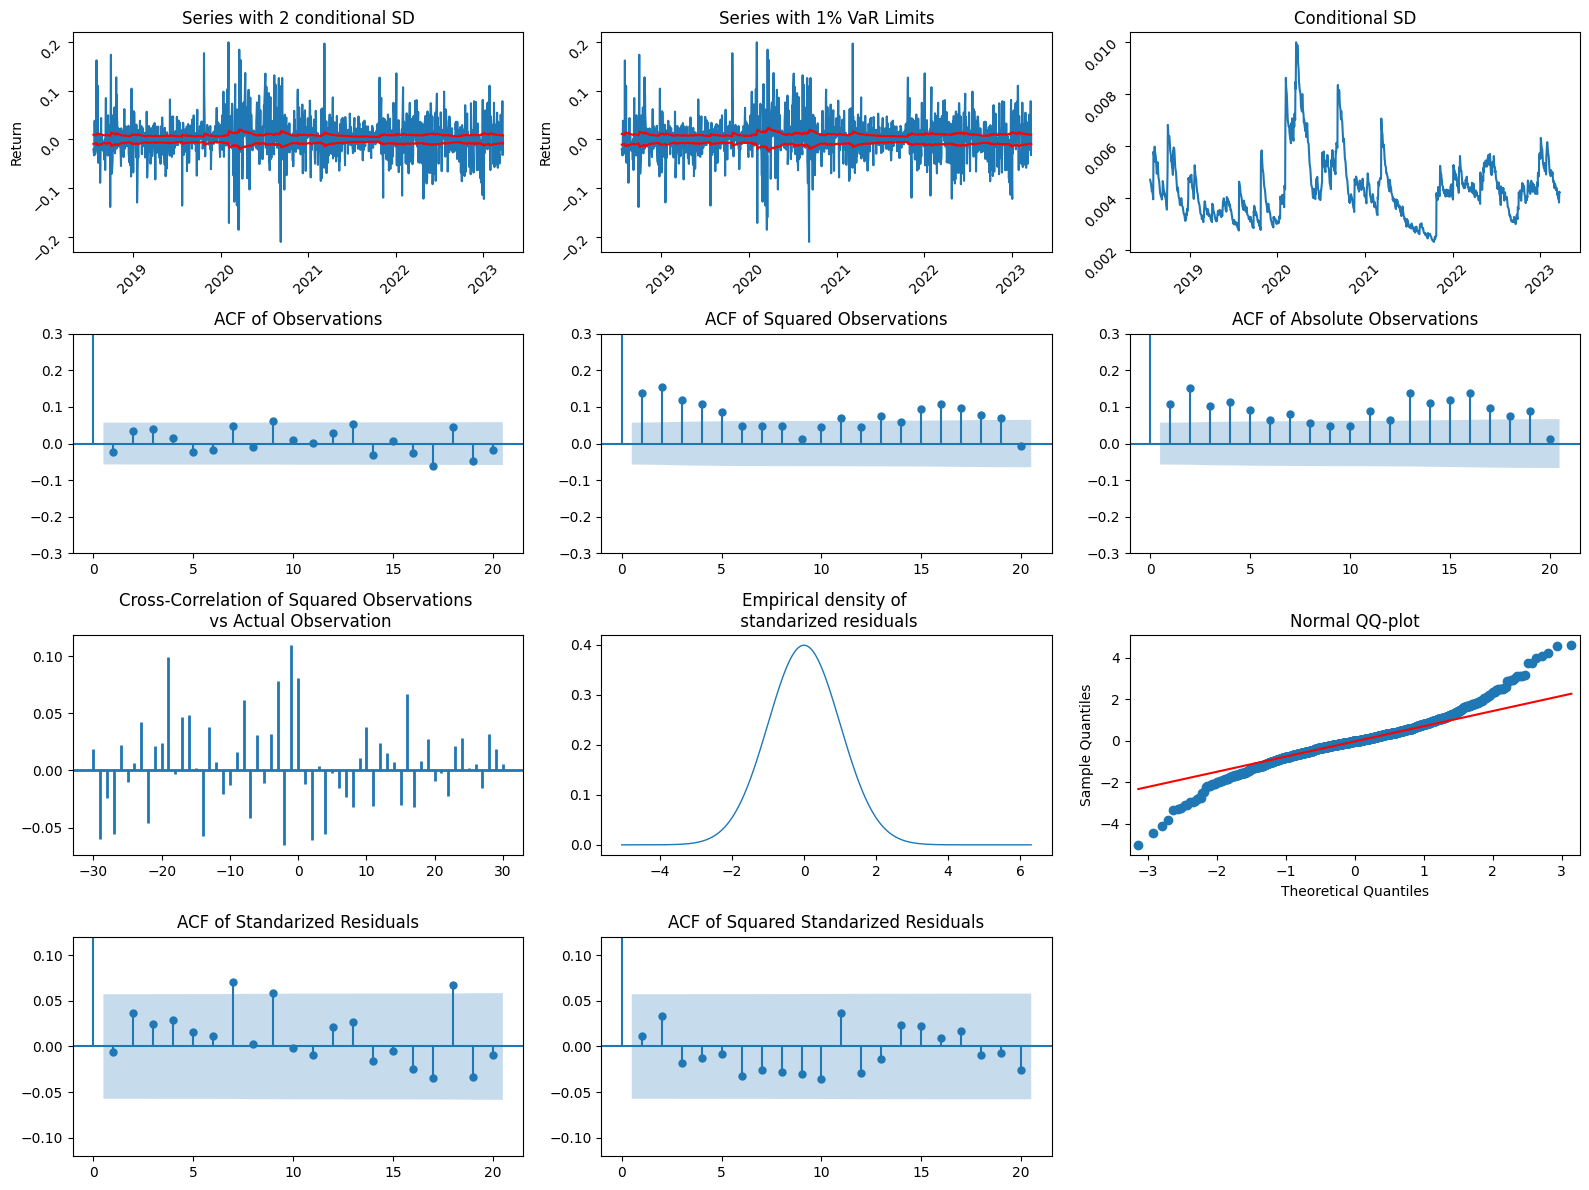

In [ ]:
# Model Diagnostic Plots for the GARCH(1,1) Model with Normal White Noise
fig, ax = plt.subplots(4, 3, figsize=(16, 12))

# Figure Row 1 Column 1
ax[0, 0].plot(TSLA)
ax[0, 0].plot(2.0 * garch11_fit.conditional_volatility / 100.0, c="r")
ax[0, 0].plot(-2.0 * garch11_fit.conditional_volatility / 100.0, c="r")
ax[0, 0].tick_params(labelrotation=45)
ax[0, 0].set_title("Series with 2 conditional SD")
ax[0, 0].set_ylabel("Return")

# Figure Row 1 Column 2
VaR_1 = stats.norm.ppf(0.99)
ax[0, 1].plot(TSLA)
ax[0, 1].plot(VaR_1 * garch11_fit.conditional_volatility / 100.0, c="r")
ax[0, 1].plot(-VaR_1 * garch11_fit.conditional_volatility / 100.0, c="r")
ax[0, 1].tick_params(labelrotation=45)
ax[0, 1].set_title("Series with 1% VaR Limits")
ax[0, 1].set_ylabel("Return")

# Figure Row 1 Column 3
ax[0, 2].plot(garch11_fit.conditional_volatility / 100.0)
ax[0, 2].set_title("Conditional SD")
ax[0, 2].tick_params(labelrotation=45)

# Figure Row 2 Column 1
sm.graphics.tsa.plot_acf(garch11_fit.resid / 100.0, lags=20, ax=ax[1, 0])
ax[1, 0].set_title("ACF of Observations")
ax[1, 0].set_ylim([-0.3, 0.3])

# Figure Row 2 Column 2
sm.graphics.tsa.plot_acf(garch11_fit.resid**2, lags=20, ax=ax[1, 1])
ax[1, 1].set_title("ACF of Squared Observations")
ax[1, 1].set_ylim([-0.3, 0.3])

# Figure Row 2 Column 3
sm.graphics.tsa.plot_acf(np.abs(garch11_fit.resid), lags=20, ax=ax[1, 2])
ax[1, 2].set_title("ACF of Absolute Observations")
ax[1, 2].set_ylim([-0.3, 0.3])

# Figure Row 3 Column 1
ax[2, 0].xcorr(
    garch11_fit.resid**2,
    garch11_fit.resid,
    usevlines=True,
    maxlags=30,
    normed=True,
    lw=2,
)
ax[2, 0].set_title("Cross-Correlation of Squared Observations \n vs Actual Observation")

# Figure Row 3 Column 2
standaraized_residuals = garch11_fit.std_resid
min_val = np.min(standaraized_residuals)
max_val = np.max(standaraized_residuals)
empirical_density = np.linspace(min_val, max_val, len(standaraized_residuals))
ax[2, 1].plot(empirical_density, stats.norm.pdf(empirical_density), lw=1)
ax[2, 1].set_title("Empirical density of \n standarized residuals")

# Figure Row 3 Column 3
sm.qqplot(garch11_fit.resid, stats.norm, fit=True, line="q", ax=ax[2, 2])
ax[2, 2].set_title("Normal QQ-plot")

# Figure Row 4 Column 1
sm.graphics.tsa.plot_acf(garch11_fit.std_resid, lags=20, ax=ax[3, 0])
ax[3, 0].set_title("ACF of Standarized Residuals")
ax[3, 0].set_ylim([-0.12, 0.12])

# Figure Row 4 Column 2
sm.graphics.tsa.plot_acf((garch11_fit.std_resid) ** 2, lags=20, ax=ax[3, 1])
ax[3, 1].set_title("ACF of Squared Standarized Residuals")
ax[3, 1].set_ylim([-0.12, 0.12])

ax[3, 2].axis("off")
fig.tight_layout()
plt.show()

## Direction
As we can see in the bove q-q plot the residual is not a white noise so the Student-T distribution did not provide a better fit than the normal distribution, a solution maybe to take another look at the data and check the outlier to see how they have impacted the model since we have skipped this wtep in our analysis

In [ ]:
!pip install pmdarima
import pmdarima as pm
from sklearn.metrics import mean_absolute_percentage_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.0 MB/s eta 0:00:00


In [ ]:
auto_arima = pm.auto_arima(X.TSLA_return, test='adf', seasonal=False, with_intercept=False, stepwise=True, trace=True)
auto_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-4083.363, Time=1.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4081.594, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-4079.984, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-4079.946, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-4079.619, Time=0.46 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-4080.430, Time=0.98 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-4076.017, Time=1.35 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-4081.368, Time=1.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-4077.868, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-4078.068, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-4077.976, Time=0.73 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-4079.328, Time=2.75 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-4086.130, Time=6.32 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-4081.870, Time=2.02 sec
 ARIMA(2,0,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1177
Model:               SARIMAX(2, 0, 2)   Log Likelihood                2049.065
Date:                Thu, 30 Mar 2023   AIC                          -4086.130
Time:                        11:07:16   BIC                          -4055.706
Sample:                             0   HQIC                         -4074.658
                               - 1177                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0033      0.002      2.188      0.029       0.000       0.006
ar.L1          0.6494      0.083      7.870      0.000       0.488       0.811
ar.L2         -0.8426      0.078    -10.834      0.000      -0.995      -0.690
ma.L1         -0.6763      0.070     -9.640      0.000      -0.814      -0.539
ma.L2          0.8882      0.068     13.124      0.000       0.756       1.021
sigma2         0.0018   4.84e-05     37.210      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               471.60
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.19
Prob(H) (two-sided):                  0.27   Kurtosis:                         6.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

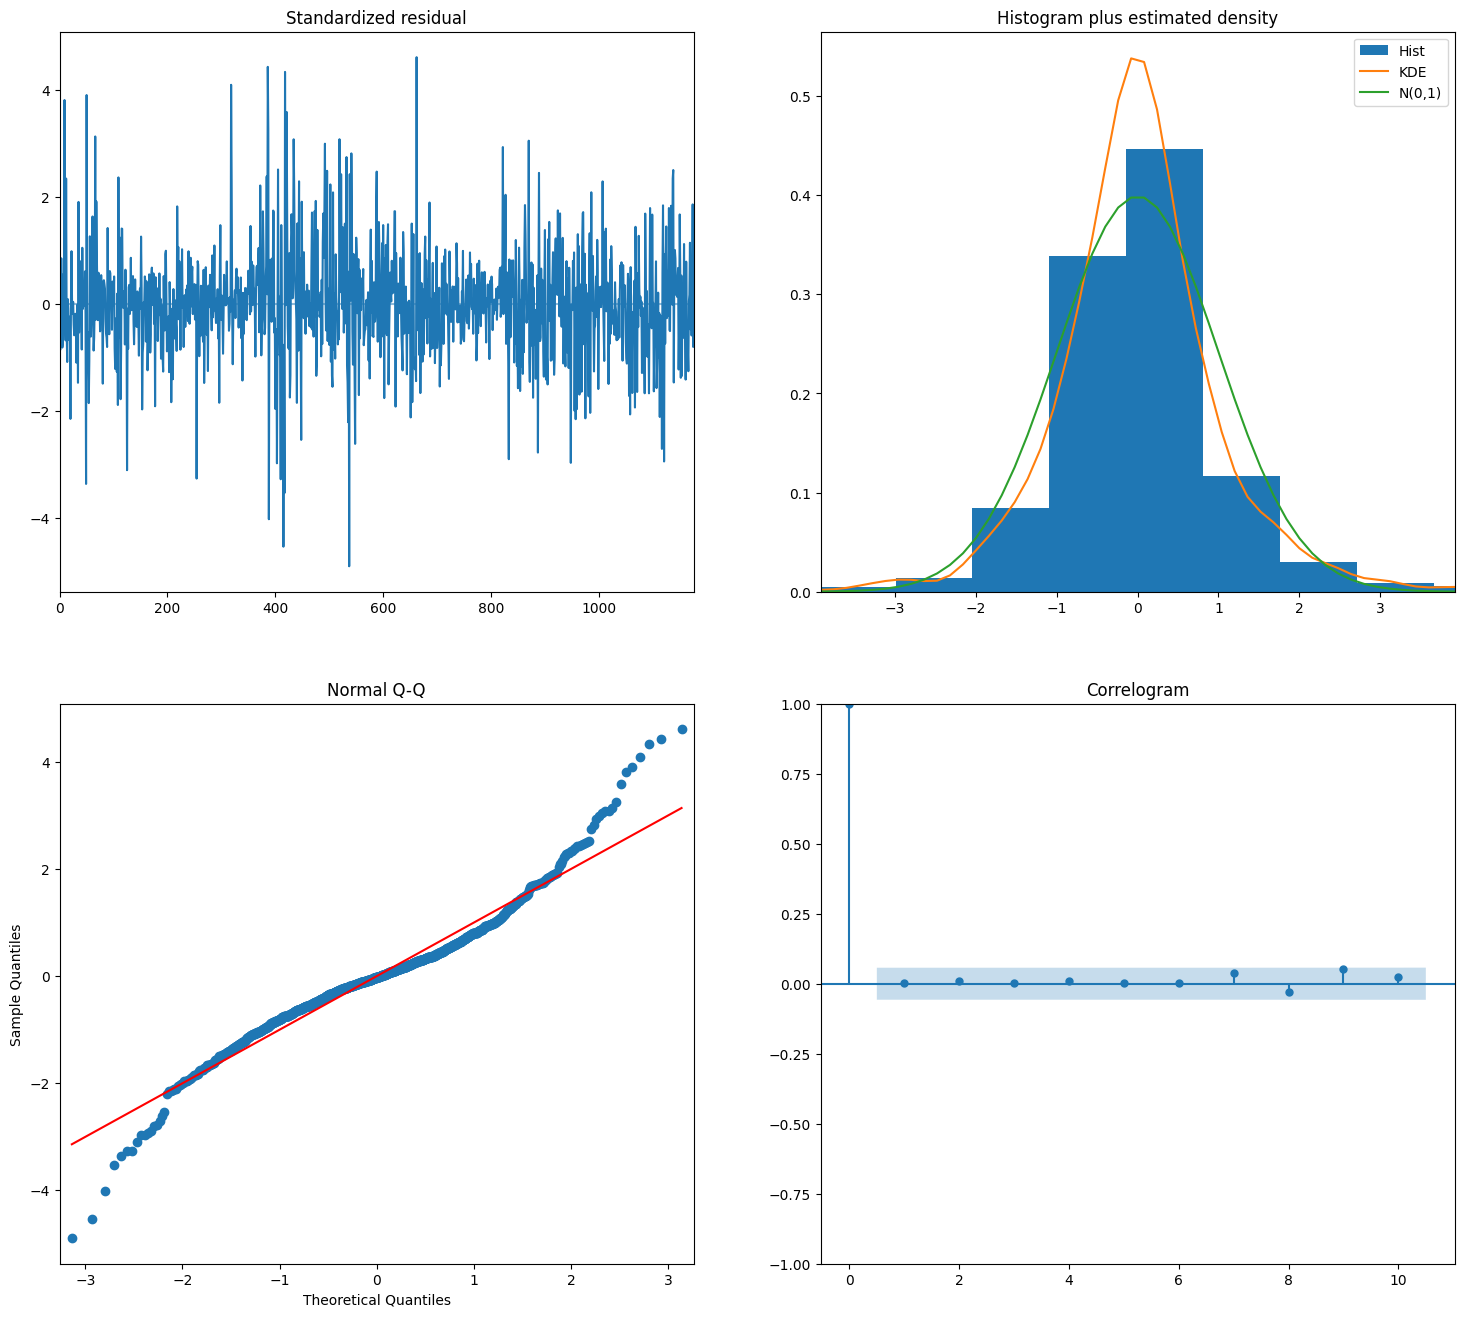

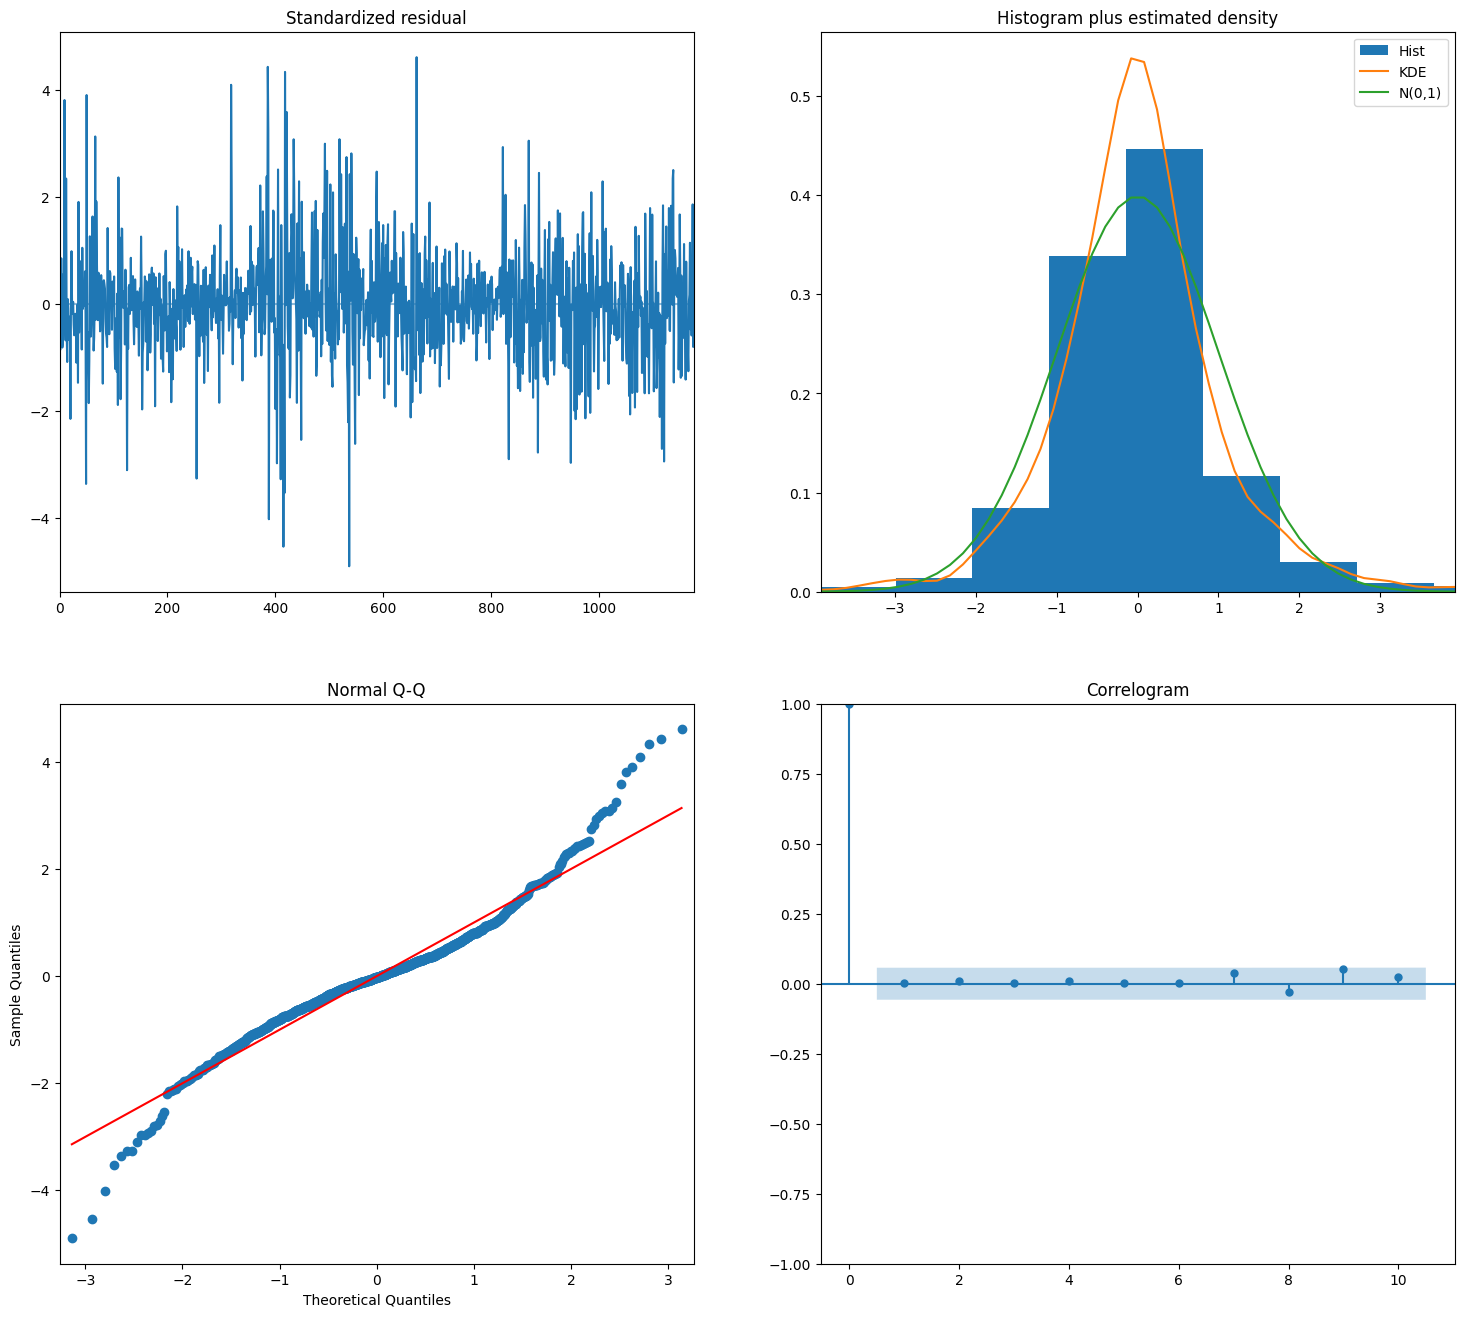

In [ ]:
auto_arima.plot_diagnostics(figsize=(18, 16)) 